# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from IPython.core import display as ICD
from itertools import combinations

# Import Data + Preprocessing 
1. Replace NaN by 0
2. Rename first Column

In [2]:
data = 'city_UrbanAtlas_l1_ratios.csv'
df = pd.read_csv(data)
df = df.fillna(0)
df = df.rename(columns={"Unnamed: 2": "No Class"})

In [3]:
df.head()

,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands
0,AL001,Tirana(FUA name),0.0,0.142073,0.773865,0.064179,0.013398,0.006484
1,AL003,Elbasan(FUA name),0.0,0.072055,0.656564,0.271382,0.000000,0.000000
2,AL004,ShkodÃ«r(FUA name),0.0,0.321917,0.605617,0.052717,0.015167,0.004583
3,AT001,Wien,0.0,0.158471,0.623209,0.182559,0.035760,0.000000
4,AT002,Graz,0.0,0.145966,0.585422,0.261324,0.007288,0.000000


# Get Features
We have 6 features: 5 classes ratios + non-classified regions

In [4]:
X = df.copy()
y = df['cc_name']
X.drop(['cc_code_short', 'cc_name'], axis=1, inplace=True)
X.head()

,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands
0,0.0,0.142073,0.773865,0.064179,0.013398,0.006484
1,0.0,0.072055,0.656564,0.271382,0.000000,0.000000
2,0.0,0.321917,0.605617,0.052717,0.015167,0.004583
3,0.0,0.158471,0.623209,0.182559,0.035760,0.000000
4,0.0,0.145966,0.585422,0.261324,0.007288,0.000000


# K-Means call with Elbow method
To find the optimal K

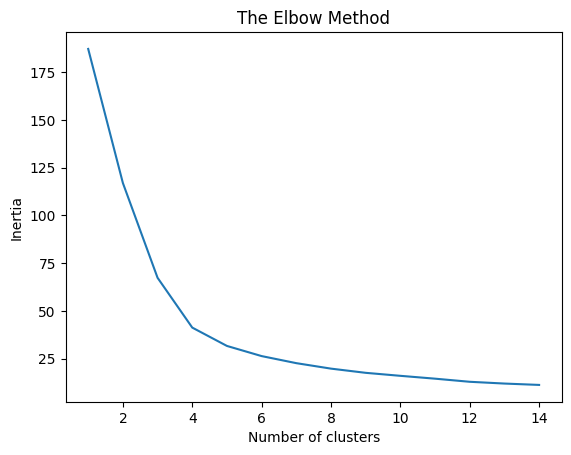

In [5]:
cs = []
max = 15
for i in range(1, max):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, max), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Use K = 4
According to the above plot, 4 looks a good condidate (the elbow point)

In [6]:
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
df['label'] = kmeans.labels_

# Statistics

In [7]:
print("Inertia: ", kmeans.inertia_)
print("Number of clusters: ", kmeans.n_clusters)
u_labels = np.unique(kmeans.labels_)
for i in u_labels:
    print("Number of elements clustered as ", i, "->", df[df['label'] == i].size)

Inertia:  41.230345209397605
Number of clusters:  4
Number of elements clustered as  0 -> 2475
Number of elements clustered as  1 -> 504
Number of elements clustered as  2 -> 3735
Number of elements clustered as  3 -> 2664


<Axes: xlabel='label'>

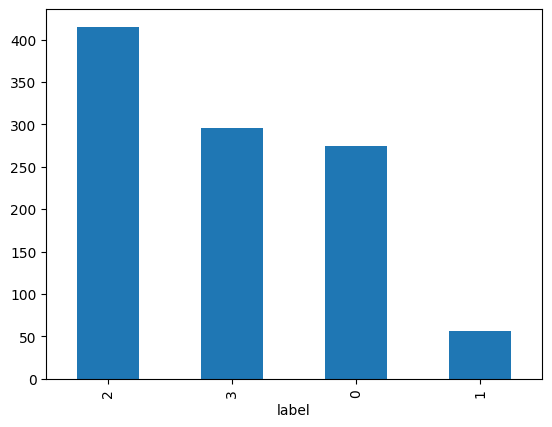

In [8]:
fig, ax = plt.subplots()
df['label'].value_counts().plot(ax=ax, kind='bar')

# Overview of every cluster

In [9]:
for i in u_labels:
    ICD.display(df[df['label'] == i])

/tmp/ipykernel_337/2534644550.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(df[df['label'] == i])


,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands,label
7,AT005,Innsbruck,0.000000,0.080145,0.232660,0.676473,0.010722,0.000000,0
8,AT006,Klagenfurt,0.000000,0.301139,0.354762,0.331709,0.012390,0.000000,0
25,BG001,Sofia,0.000000,0.331525,0.431159,0.228703,0.008577,0.000036,0
27,BG003,Varna,0.000000,0.137210,0.461117,0.347825,0.051296,0.002551,0
29,BG005,Pleven,0.000000,0.334877,0.335409,0.322035,0.007679,0.000000,0
...,...,...,...,...,...,...,...,...,...
956,UK502,North Lanarkshire (Airdrie/Bellshill/Coatbridg...,0.000000,0.356499,0.301292,0.323921,0.015648,0.002641,0
975,UK521,Oldham,0.000000,0.270194,0.403932,0.316274,0.009600,0.000000,0
980,UK526,Rochdale,0.000000,0.312242,0.379942,0.289124,0.018459,0.000233,0
1011,UK557,Blackburn with Darwen,0.000000,0.321241,0.295601,0.364087,0.019070,0.000000,0


/tmp/ipykernel_337/2534644550.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(df[df['label'] == i])


,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands,label
216,EL010,Chania,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1
217,EL011,Xanthi,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1
218,EL012,Katerini,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1
219,EL013,Serres,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1
220,EL014,Trikala,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1
257,ES037,"Puerto de Santa MarÃ­a, El",0.999866,0.000000e+00,0.000000,0.000000e+00,0.000134,0.000000,1
265,ES045,Ceuta,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1
275,ES055,Melilla,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1
282,ES062,SanlÃºcar de Barrameda,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1
285,ES065,"LÃ­nea de la ConcepciÃ³n, La",1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1


/tmp/ipykernel_337/2534644550.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(df[df['label'] == i])


,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands,label
0,AL001,Tirana(FUA name),0.0,0.142073,0.773865,0.064179,0.013398,0.006484,2
1,AL003,Elbasan(FUA name),0.0,0.072055,0.656564,0.271382,0.000000,0.000000,2
2,AL004,ShkodÃ«r(FUA name),0.0,0.321917,0.605617,0.052717,0.015167,0.004583,2
3,AT001,Wien,0.0,0.158471,0.623209,0.182559,0.035760,0.000000,2
4,AT002,Graz,0.0,0.145966,0.585422,0.261324,0.007288,0.000000,2
...,...,...,...,...,...,...,...,...,...
1030,UK578,Gosport,0.0,0.112366,0.814746,0.058873,0.014014,0.000000,2
1031,UK579,Eastleigh,0.0,0.238650,0.543724,0.207776,0.004026,0.005823,2
1039,XK001,Pristina(FUA name),0.0,0.233159,0.754855,0.011986,0.000000,0.000000,2
1040,XK002,Prizren(FUA name),0.0,0.316722,0.653233,0.027650,0.002394,0.000000,2


/tmp/ipykernel_337/2534644550.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(df[df['label'] == i])


,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands,label
19,BE006,Brugge,8.764853e-05,0.365111,0.458468,0.078482,0.090686,0.007165,3
20,BE007,Namur,5.677779e-07,0.394744,0.348140,0.243693,0.013423,0.000000,3
22,BE009,Mons,0.000000e+00,0.386720,0.360993,0.221747,0.027150,0.003390,3
23,BE010,Kortrijk,0.000000e+00,0.463986,0.476642,0.052857,0.006515,0.000000,3
26,BG002,Plovdiv,0.000000e+00,0.459353,0.514294,0.005315,0.015814,0.005224,3
...,...,...,...,...,...,...,...,...,...
1018,UK564,Warwick,9.417044e-04,0.708284,0.234150,0.050480,0.006144,0.000000,3
1019,UK565,Newcastle-under-Lyme,9.934862e-04,0.651092,0.251118,0.093509,0.002647,0.000640,3
1022,UK568,Cheshire West and Chester,5.770922e-04,0.682652,0.232026,0.036567,0.012794,0.035383,3
1033,UK581,Rugby,0.000000e+00,0.790722,0.169641,0.025630,0.014007,0.000000,3


# Plot the clusters 
For every pair of attributes, plot the 4 clusters

In [10]:
features = [*range(2, len(X.columns)+2)]
pairs = list(combinations(features, 2))

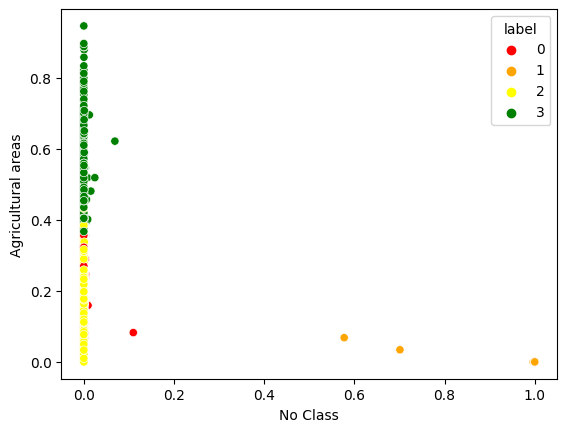

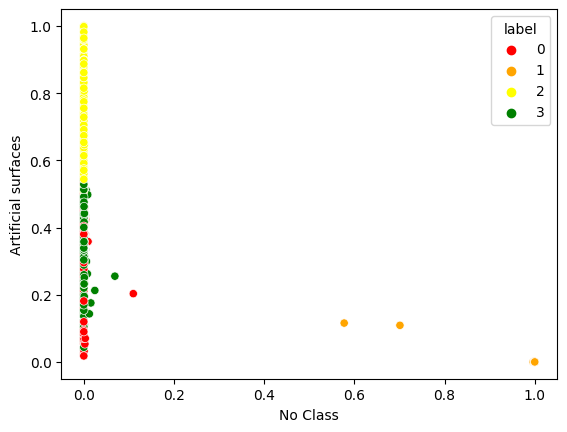

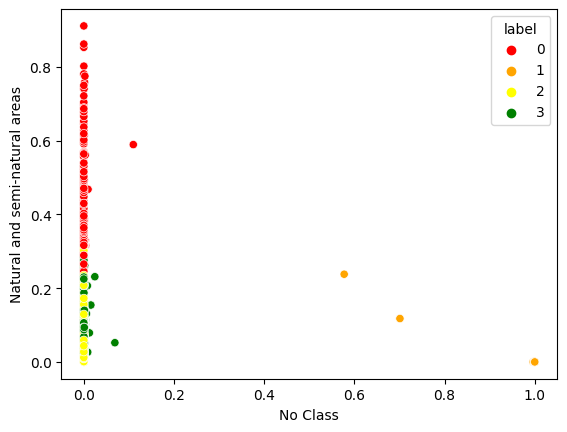

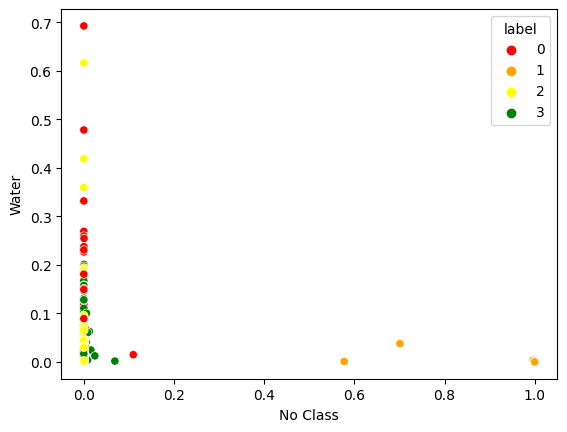

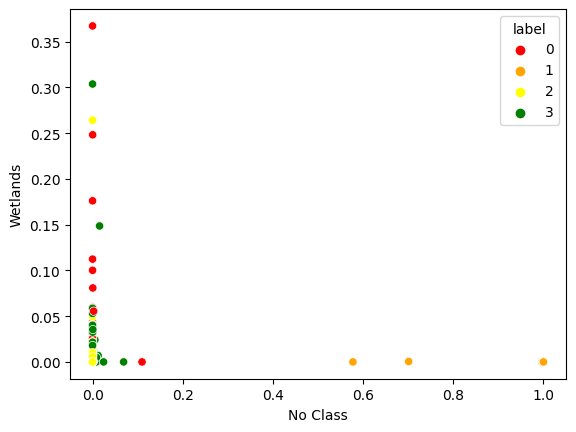

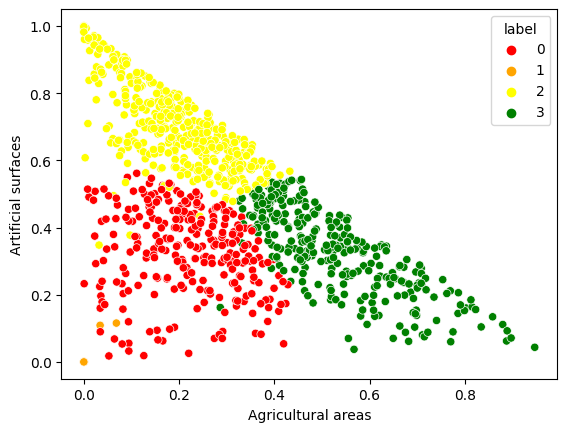

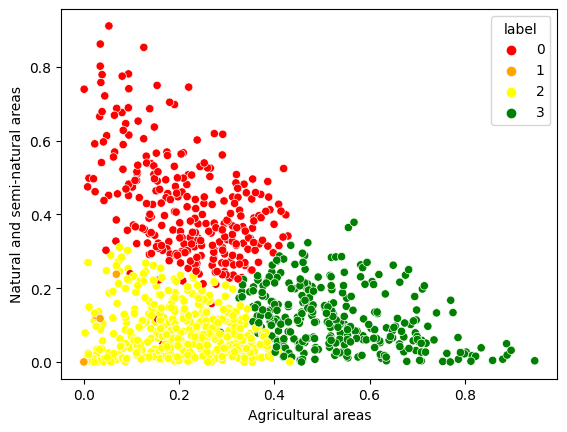

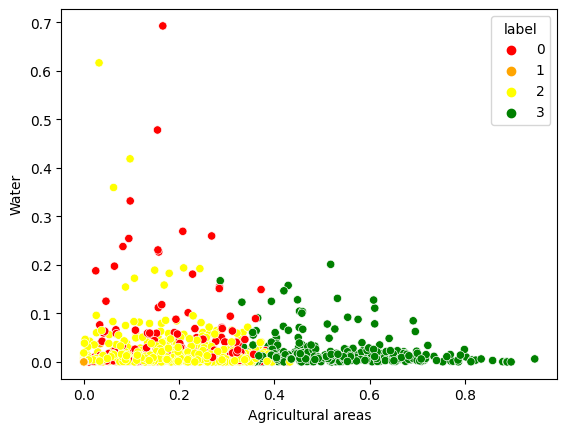

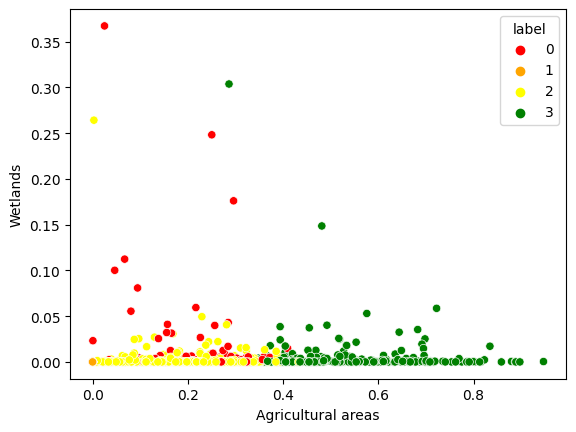

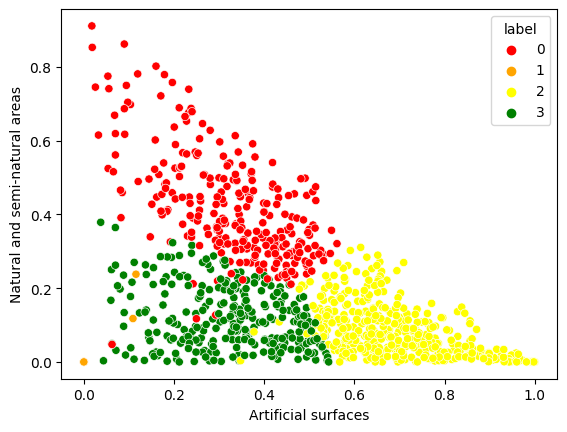

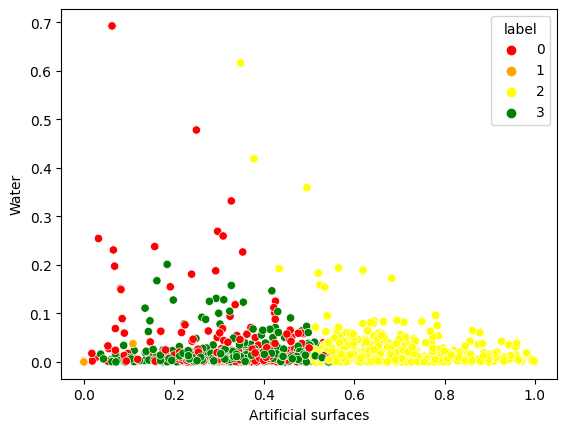

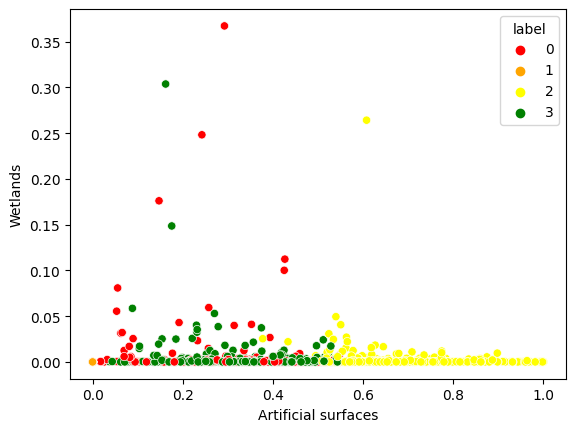

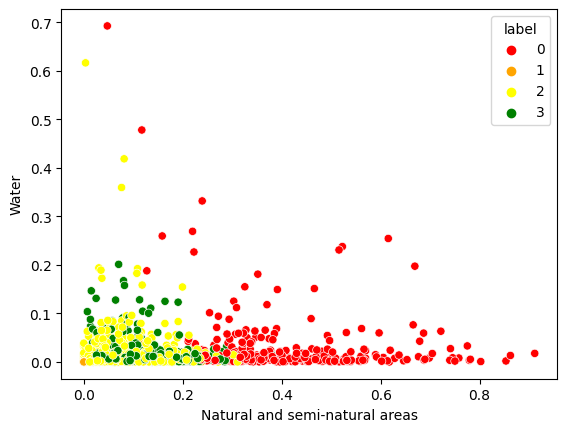

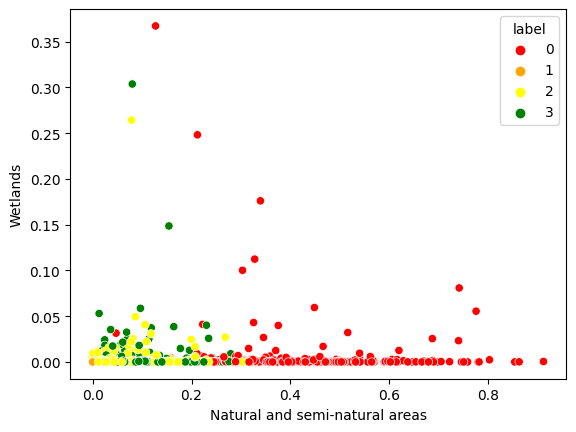

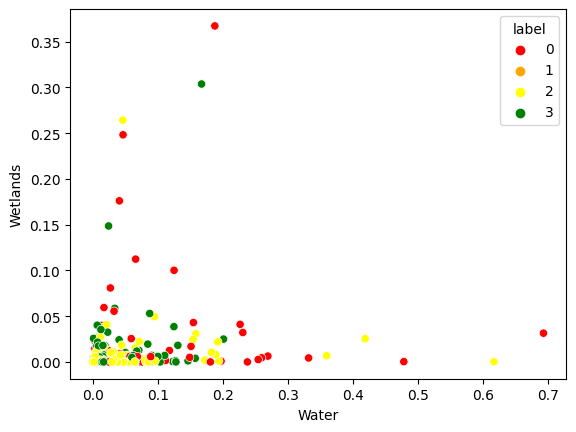

In [11]:
import seaborn as sns
columns= df.columns.values.tolist()
for j in pairs:
    fig, ax = plt.subplots()
    ax = sns.scatterplot(x=columns[j[0]],y=columns[j[1]],hue = 'label',data = df,legend='full',
                         palette = {0:'red',1:'orange',2:'yellow',3:'green'})
    plt.xlabel(columns[j[0]])
    plt.ylabel(columns[j[1]])
    plt.show()

# Conclusion 
The clusters have this possible significations:
1. Cluster 0: Cities with more Natural and semi-natural areas.
2. Cluster 1: Cities with aread No-class classification.
3. Cluster 2: Cities with more Artificial surfaces.
4. Cluster 3: Cities with more Agricultural areas.